In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [4]:
# Dataset disponível no sklearn, basta importar
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
type(boston)

sklearn.datasets.base.Bunch

In [7]:
#estrutura de boston
boston.data.shape
#506 linhas por 13 colunas

(506, 13)

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
#joguei o dataset para dentro do dataframe
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
#mudei o nome das colunas
df.columns = boston.feature_names

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#valores dos preços das casas
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [17]:
#criando coluna
df["PRICE"] = boston.target

In [18]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
#fazer regressão linear múltipla
from sklearn.linear_model import LinearRegression

In [22]:
#quero todo o dataframe menos o PRICE, se axis = 0 seria linha(padrão)
x = df.drop("PRICE", axis=1)
#x não pode ter os preços das casas, apenas as variáveis preditroras

y = df["PRICE"]

<function matplotlib.pyplot.show>

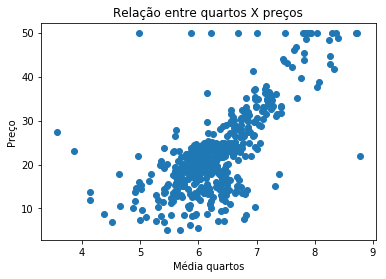

In [24]:
plt.scatter(df.RM, y)
plt.xlabel("Média quartos")
plt.ylabel("Preço")
plt.title("Relação entre quartos X preços")
plt.show

In [25]:
regr = LinearRegression()

In [26]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#mandar prever preço de várias casas, vou mandar prever todas as casas em 'x'
regr.predict(x)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945,  11.44806825,  18.05900412,
         8.78841666,  14.27882319,  13.69097132,  23.81755469,
        22.34216285,  23.11123204,  22.91494157,  31.35826216,
        34.21485385,  28.0207132 ,  25.20646572,  24.61192851,
        22.94438953,  22.10150945,  20.42467417,  18.03614022,
         9.10176198,  17.20856571,  21.28259372,  23.97621248,
        27.65853521,  24.0521088 ,  15.35989132,  31.14817003,
        24.85878746,  33.11017111,  21.77458036,  21.08526739,
        17.87203538,  18.50881381,  23.9879809 ,  22.54

<function matplotlib.pyplot.show>

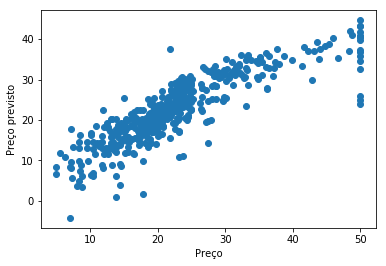

In [29]:
#motar gráfico para comparar
plt.scatter(df["PRICE"], regr.predict(x))
plt.xlabel("Preço")
plt.ylabel("Preço previsto")
plt.show

In [32]:
#calcular a média da diferença entre o preço previsto e o preço real
mse = np.mean((df["PRICE"] - regr.predict(x)) ** 2)

In [33]:
mse

21.897779217687493